In [1]:
# importing required libraries
import tensorflow as tf 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D , Dense , Dropout , Flatten
import numpy as np 
from sklearn.model_selection import train_test_split, StratifiedKFold 
import matplotlib.pyplot as plt 
import cv2 
import pandas as pd 
from glob import glob 

In [2]:
!unzip archive.zip

Archive:  archive.zip
  inflating: README_rpc-cv-images.txt  
  inflating: paper/04l5I8TqdzF9WDMJ.png  
  inflating: paper/0Og76sl5CJhbxWWx.png  
  inflating: paper/0RA9rcrv8iVvuDDU.png  
  inflating: paper/0Uomd0HvOB33m47I.png  
  inflating: paper/0a3UtNzl5Ll3sq8K.png  
  inflating: paper/0cb6cVL8pkfi4wF6.png  
  inflating: paper/0eqArS2GgsBeqgSn.png  
  inflating: paper/0t08v9bAaA0mXGCQ.png  
  inflating: paper/0vugygEjxQJPr9yz.png  
  inflating: paper/0zKU6wEhT2cDe9j0.png  
  inflating: paper/14K62H4KG1hg5qiJ.png  
  inflating: paper/1Dfw5FRlS4h60JPX.png  
  inflating: paper/1Frbe8cdOdkciOBg.png  
  inflating: paper/1Tt9U9SzrOm98Xtw.png  
  inflating: paper/1fKclJk4eBWOQSR1.png  
  inflating: paper/1jHtb93pI8f6pfKo.png  
  inflating: paper/1oKnUgV2CdCaQUUX.png  
  inflating: paper/1uoW7QcH2qAgCTxv.png  
  inflating: paper/1yKjzquSvl9ShK7K.png  
  inflating: paper/1yeoLbmp4alVOtFv.png  
  inflating: paper/27XFtQjjXQ8AP8Tl.png  
  inflating: paper/2DQbLQfHlfrcATqi.png  
  inflating: p

In [3]:
# defining image folders
base_folder =  '/content/'
paper_subfolder = base_folder + 'paper'
rock_subfolder = base_folder + 'rock'
scissors_subfolder = base_folder + 'scissors'

In [4]:
# finding filenames in respective subfolders
paper_filenames = glob(paper_subfolder + '/*')
rock_filenames = glob(rock_subfolder + '/*')
scissors_filenames = glob(scissors_subfolder + '/*')

# printing filename info 
print("Total {} images found in {} folder".format(len(paper_filenames), paper_subfolder))
print("Total {} images found in {} folder".format(len(rock_filenames), rock_subfolder))
print("Total {} images found in {} folder".format(len(scissors_filenames), scissors_subfolder))

Total 712 images found in /content/paper folder
Total 726 images found in /content/rock folder
Total 750 images found in /content/scissors folder


In [5]:
# creating a dataframe for containing the filepaths (complete absolute filepaths) and corresponding class labels
label_names   = ['paper','rock','scissors']
all_filepaths = paper_filenames + rock_filenames + scissors_filenames
all_labels    = [label_names[0]]*len(paper_filenames) + [label_names[1]]*len(rock_filenames) + [label_names[2]]*len(scissors_filenames)
df = pd.DataFrame({'filename':all_filepaths, 'class':all_labels})
print(df.head())
print(df.describe())

                              filename  class
0  /content/paper/uHBQbKd9VTYWdctJ.png  paper
1  /content/paper/D9nbrQLDSgDMNh3G.png  paper
2  /content/paper/OhkFvTOiBqphyG0I.png  paper
3  /content/paper/URj0hmH1Y9lNObL9.png  paper
4  /content/paper/yWLbGUHRsGx5ocE9.png  paper
                                  filename     class
count                                 2188      2188
unique                                2188         3
top     /content/rock/OCa85cn2JdZzOe8c.png  scissors
freq                                     1       750


In [6]:
# performing train, test set splits
train_val_df, test_df = train_test_split(df, test_size=0.1, random_state=0, shuffle=True, stratify=df['class'])
print("Training+Validation set")
print(train_val_df.head())
print(train_val_df.describe())
print('*'*50)
print("Testing set")
print(test_df.head())
print(test_df.describe())
test_df['filename']

Training+Validation set
                                    filename     class
730       /content/rock/nQ7DM3VMBj0NdM0u.png      rock
248      /content/paper/LEA78quc0fi2hq9W.png     paper
1983  /content/scissors/v9Y88d4jR0phu1rv.png  scissors
453      /content/paper/dIg7Ds4xEzk0pyWZ.png     paper
1341      /content/rock/I1T89xw2qr4aTrzq.png      rock
                                   filename     class
count                                  1969      1969
unique                                 1969         3
top     /content/paper/jl6AlteXSalbS3rG.png  scissors
freq                                      1       675
**************************************************
Testing set
                                 filename  class
1204   /content/rock/4QtEaLUAuzeJZKdK.png   rock
448   /content/paper/dZxpgHYRuQNv7T7A.png  paper
486   /content/paper/Uok6jb9ObZxSWCDu.png  paper
807    /content/rock/RkKc61MLjm4clTPg.png   rock
151   /content/paper/EJ7cNnnea5yCEaOd.png  paper
                   

1204        /content/rock/4QtEaLUAuzeJZKdK.png
448        /content/paper/dZxpgHYRuQNv7T7A.png
486        /content/paper/Uok6jb9ObZxSWCDu.png
807         /content/rock/RkKc61MLjm4clTPg.png
151        /content/paper/EJ7cNnnea5yCEaOd.png
                         ...                  
1777    /content/scissors/ejWJ6Ber6qqXnuag.png
1711    /content/scissors/bn7yju6XvU87slzH.png
1922    /content/scissors/2vDaPrc35RGC8nvM.png
795         /content/rock/lpmH56YGWEHsmhBi.png
1483    /content/scissors/TxkHaqZ5Mg3Jfs80.png
Name: filename, Length: 219, dtype: object

In [7]:
import os
import random
import shutil
# defining image folders

classes      = ['paper','rock','scissors']
folders = [paper_subfolder,rock_subfolder,scissors_subfolder]
for i in range(3):
  training = base_folder + 'train/' + classes[i] + '/'
  validation = base_folder + 'validation/' + classes[i] + '/'
  test = base_folder + 'test/' + classes[i] + '/'
  #files = os.listdir(folders[i])
  if not os.path.exists(training): # create a tempory folder 'preview' to save generated images
    os.makedirs(training)
  if not os.path.exists(validation): # create a tempory folder 'preview' to save generated images
    os.makedirs(validation)
  if not os.path.exists(test): # create a tempory folder 'preview' to save generated images
    os.makedirs(test)

  for m in range(int(0.8*700/3)):
    files = [filenames for (filenames) in os.listdir(folders[i])]
    random_file = random.choice(files)
    shutil.copy(os.path.join(folders[i], random_file), training)
  for m in range(int(0.1*700/3)):
    files = [filenames for (filenames) in os.listdir(folders[i])]
    random_file = random.choice(files)
    shutil.copy(os.path.join(folders[i], random_file), validation)    
  for m in range(int(0.1*700/3)):
    files = [filenames for (filenames) in os.listdir(folders[i])]
    random_file = random.choice(files)
    shutil.copy(os.path.join(folders[i], random_file), test)

In [8]:
# Defining ImageDataGenerators for train, val and test sets 
train_data_generator = ImageDataGenerator( rotation_range=40, width_shift_range=0.2, height_shift_range=0.2, rescale=1./255,
                        shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')
val_data_generator   =  ImageDataGenerator(rescale=1./255)
test_data_generator  =  ImageDataGenerator(rescale=1./255)

In [9]:
# Defining image resolution, batch size, etc 
IMAGE_WIDTH=150
IMAGE_HEIGHT=150
BATCH_SIZE=30

In [10]:
# import vgg16 model 
from tensorflow.python.keras.applications.resnet import ResNet50
# load model
model=ResNet50()
# summarize the model
model.summary()

102973440/102967424 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
________________________

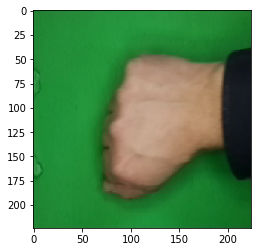

(224, 224, 3)

In [11]:
from keras.layers import Input
import random
import matplotlib.pyplot as plt 
from matplotlib.image import imread
from matplotlib import pyplot
from tensorflow.keras.preprocessing.image import load_img, img_to_array

pic      = random.choice(os.listdir(base_folder + 'train/rock/'))
fileName = base_folder + 'train/rock/' + pic
image    = load_img(fileName, target_size=(224,224),color_mode="rgb")#"rgb" for color mode; "grayscale"
pyplot.imshow(image)
pyplot.show()
photo=img_to_array(image)# convert to numpy array
photo.shape

In [12]:
from tensorflow.keras.applications import ResNet50
from sklearn.model_selection import train_test_split, StratifiedKFold
from tensorflow.keras.applications.vgg16 import preprocess_input 
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Conv2D, MaxPooling2D , Dense, Dropout, Flatten, Input, BatchNormalization
from keras.models import Model
# # Defining model architecture for transfer learning 

# # Loading ResNet50 model, initializing with weights trained on the imagenet dataset, input image shape of 
size=150
#resnet = ResNet50(include_top=False, weights="imagenet", input_tensor=Input(shape=(size,size,3)))
vgg     = VGG16(include_top=False, weights="imagenet", input_tensor=Input(shape=(size,size,3)))

# # freeze all layers so that they will *not* be updated during the training process
#resnet.trainable = False
vgg.trainable = False

# # Flattening the output of resent layer
#flatten = Flatten()(resnet.output)
flatten = Flatten()(vgg.output)

# # Adding layers at the output
bn = BatchNormalization()(flatten)
dropout = Dropout(0.5)(bn)
num_output_neurons = 3
output = Dense(num_output_neurons, activation='softmax', kernel_regularizer="l2", bias_regularizer="l2")(flatten)

# # constructing the model 
#model = Model(inputs=resnet.input, outputs=output) 
model = Model(inputs=vgg.input, outputs=output) 

# # compiling the model
model.compile(optimizer="sgd", loss="categorical_crossentropy", metrics=["accuracy"])

# # printing model summary
print(model.summary())

58900480/58889256 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
______________________________________________________________

In [13]:
# Defining K-fold stratification for train and validation set splits for cross-validation
num_cv_splits = 5
skf = StratifiedKFold(n_splits=num_cv_splits, random_state=0, shuffle=True)
list_train_idxs = []
list_val_idxs   = []
for train_idxs, val_idxs in skf.split(train_val_df['class'], train_val_df['class']):
  list_train_idxs.append(train_idxs)
  list_val_idxs.append(val_idxs)
print(len(list_train_idxs), len(list_val_idxs))
print(len(list_train_idxs[0]), len(list_val_idxs[0]))

5 5
1575 394


In [14]:
# Performing K-fold(5-fold) cross-validation 
train_losses     = []
train_accuracies = []
val_losses       = []
val_accuracies   = []
accResnetList    = []
NUM_EPOCHS = 1
training_data_dir   = base_folder +'train/'
validation_data_dir = base_folder +'validation/'
test_data_dir       = base_folder +'test/'
IMAGE_WIDTH=150
IMAGE_HEIGHT=150
BATCH_SIZE=10

test_data_generator  =  ImageDataGenerator(rescale=1./255)
test_generator = test_data_generator.flow_from_directory(
    test_data_dir,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=1,
    class_mode="categorical",
    shuffle=False)

for i in range(num_cv_splits):
  train_idxs = list_train_idxs[i]
  val_idxs   = list_val_idxs[i]
  train_df = train_val_df.iloc[train_idxs]
  val_df   = train_val_df.iloc[val_idxs]
  
  train_gen = train_data_generator.flow_from_dataframe(train_df, target_size=(IMAGE_HEIGHT, IMAGE_WIDTH), batch_size=BATCH_SIZE)
  val_gen   = val_data_generator.flow_from_dataframe(val_df, target_size=(IMAGE_HEIGHT, IMAGE_WIDTH), batch_size=BATCH_SIZE)
  #modelRes = finetuning_model()
  history = model.fit(train_gen, epochs=NUM_EPOCHS, steps_per_epoch=len(train_df)//BATCH_SIZE, validation_data=val_gen, validation_steps=len(val_df)//BATCH_SIZE) # switching to model.fit since model.fit_generator is being deprecated
  # Check classification accuracy on the test set
  _, accResNet=model.evaluate(test_generator, steps=len(test_generator),verbose=0)
  accResnetList.append(accResNet)
  train_losses.append(history.history['loss'][-1]) 
  val_losses.append(history.history['val_loss'][-1]) 
  train_accuracies.append(history.history['accuracy'][-1]) 
  val_accuracies.append(history.history['val_accuracy'][-1])   

Found 68 images belonging to 3 classes.
Found 1575 validated image filenames belonging to 3 classes.
Found 394 validated image filenames belonging to 3 classes.
157/157 [==============================] - 29s 82ms/step - loss: 2.2238 - accuracy: 0.6658 - val_loss: 0.1541 - val_accuracy: 0.9692
Found 1575 validated image filenames belonging to 3 classes.
Found 394 validated image filenames belonging to 3 classes.
157/157 [==============================] - 12s 78ms/step - loss: 0.3065 - accuracy: 0.9252 - val_loss: 0.2370 - val_accuracy: 0.9564
Found 1575 validated image filenames belonging to 3 classes.
Found 394 validated image filenames belonging to 3 classes.
157/157 [==============================] - 12s 79ms/step - loss: 0.2434 - accuracy: 0.9482 - val_loss: 0.0991 - val_accuracy: 1.0000
Found 1575 validated image filenames belonging to 3 classes.
Found 394 validated image filenames belonging to 3 classes.
157/157 [==============================] - 12s 79ms/step - loss: 0.3051 - acc

In [15]:
# saving and loading the .h5 model
 
# save model
model.save('PRSModelWeights.h5')
print('Model Saved!')


Model Saved!


In [16]:
loaded_model = tf.keras.models.load_model('PRSModelWeights.h5')

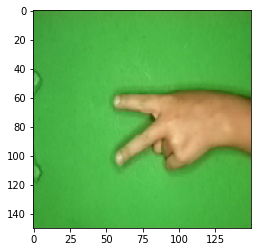

(150, 150, 3)

In [17]:
#Test model with random picture
pic      = random.choice(os.listdir(base_folder + 'train/scissors/'))
fileName = base_folder + 'train/scissors/' + pic
image    = load_img(fileName, target_size=(150,150),color_mode="rgb")#"rgb" for color mode; "grayscale"
pyplot.imshow(image)
pyplot.show()
photo=img_to_array(image)# convert to numpy array
photo.shape

In [18]:
# now we need to reshape to image to VGG16 required input format
photo = photo.reshape((1, photo.shape[0], photo.shape[1], photo.shape[2]))
photo.shape

ypred=loaded_model.predict(photo)
print('Newest Prediction is')
print(classes[np.argmax(ypred)])


Newest Prediction is
scissors


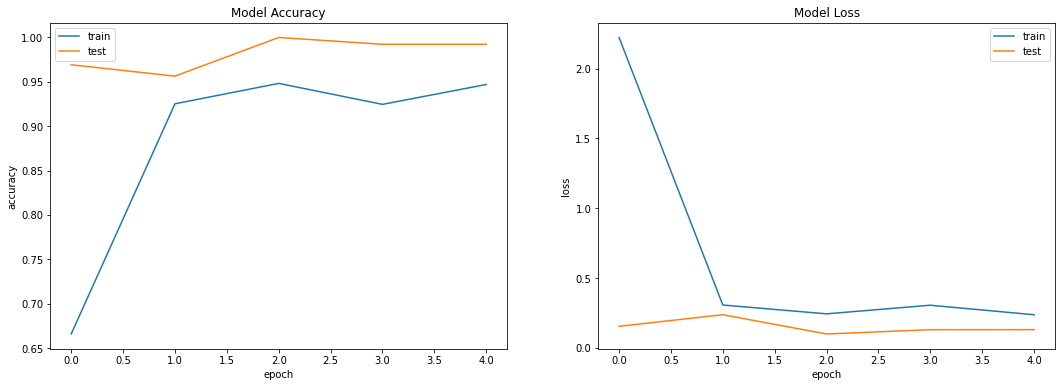

In [21]:
# plotting loss and accuracy results 

import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(18,6))

# summarize history for accuracy
ax[0].plot(train_accuracies)
ax[0].plot(val_accuracies)
ax[0].set_title('Model Accuracy')
ax[0].set_ylabel('accuracy')
ax[0].set_xlabel('epoch')
ax[0].legend(['train', 'test'], loc='upper left')

# summarize history for loss
ax[1].plot(train_losses)
ax[1].plot(val_losses)
ax[1].set_title('Model Loss')
ax[1].set_ylabel('loss')
ax[1].set_xlabel('epoch')
ax[1].legend(['train', 'test'], loc='upper right')

plt.show()